# Fall 2022 Data Science Intern Challenge Q1
## By Tengkai Yu

## Import the data

In [1]:
import pandas as pd

In [2]:
fname = '2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'

In [3]:
df = pd.read_csv(fname)

In [4]:
df.shape

(5000, 7)

In [5]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
date_max = df.created_at.max()
date_min = df.created_at.min()
print(date_max, date_min)

2017-03-30 9:55:00 2017-03-01 0:08:09


## a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [7]:
df.order_amount.mean()

3145.128

It seems the naive calculation is correct.But let us dive deeper to the data set.

In [8]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

This is strange! Even 75% is only 390. How come the average and the standard diviation is so large?

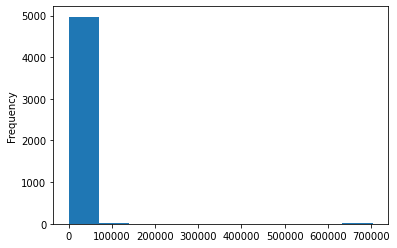

In [9]:
df.order_amount.plot.hist()

We can see there are anomalies in the data. So let's figure out what is going wrong with it!

In [13]:
print(df.groupby(['shop_id'])['order_amount'].mean().sort_values(ascending=False))
print(df.groupby(['user_id'])['order_amount'].mean().sort_values(ascending=False))

shop_id
42     235101.490196
78      49213.043478
50        403.545455
90        403.224490
38        390.857143
           ...      
53        214.117647
100       213.675000
32        189.976190
2         174.327273
92        162.857143
Name: order_amount, Length: 100, dtype: float64
user_id
607    704000.000000
878     14266.909091
766      8007.600000
834      6019.000000
915      5785.142857
           ...      
892       227.307692
899       226.666667
827       226.500000
939       219.600000
864       209.157895
Name: order_amount, Length: 301, dtype: float64


We can find that both Store 42 and store 78 are having some anomalies!

In [18]:
df[df['shop_id'] == 42]\
  .sort_values('order_amount', ascending=False)\
  .head(15)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00


In [19]:
df[df['shop_id'] == 78]\
  .sort_values('order_amount', ascending=False)\
  .head(15)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05


**Answer to question a:**
1. Store 42 is having a wired record that happend multiple times. The record says that the user 607 purches 2000 items everyday at 4:00 PM. This seems like a error in the system, thus needs to be removed.
2. Store 78's price per item seems mistaken, the price range is like 100 times of the regular sneakers. We should communicate with the store and fix the values.

## What metric would you report for this dataset? And What is its value?

First, let us fix the dataframe. Let's drop the record of user 607 and store 78. Please notice that we have no choice but dropping store 78 data for now since we do not have any outer resource to fix the values.

In [20]:
df.drop(df[df.user_id == 607].index, inplace=True)
df.drop(df[df.shop_id == 78].index, inplace=True)

Now we can evaluate the average order value (AOV) again!

In [21]:
df.order_amount.mean()

302.58051448247926

**The average order value (AOV) should be 302.58**